## Read Data

In [1]:
import numpy as np 
import os
filename = os.path.join(os.getcwd() + '/data', 'train.txt')
X_train = np.genfromtxt(filename)
features = X_train[:, 1:]
labels = X_train[:, 0]
print(features.shape)

(7291, 256)


## Show Samples

In [2]:
from lib import show_sample
show_sample(features, 131)

ModuleNotFoundError: No module named 'torch'

## Subplot Labels

In [ ]:
from lib import plot_digit_samples
plot_digit_samples(features, labels)

ModuleNotFoundError: No module named 'torch'

## Mean at pxl

In [ ]:
from lib import digit_mean_at_pixel

print('Mean at pixel (10, 10) of digit 0 =', '%.4f' % digit_mean_at_pixel(features, labels, 0))

Mean at pixel (10, 10) of digit 0 = -0.5042


## Variance at pxl

In [ ]:
from lib import digit_variance_at_pixel

print('Variance at pixel (10, 10) of digit 0 =','%.4f' % digit_variance_at_pixel(features, labels, 0))

Variance at pixel (10, 10) of digit 0 = 0.5245


## Mean and Variance at digit

In [ ]:
from lib import digit_mean, digit_variance
print(digit_variance(features, labels, 0)[0, :5])
# digit_mean(features, labels, 0)[0, :5]
print()

[0.00224522 0.00660664 0.01959062 0.0629012  0.18036652]



## Show Mean at digit

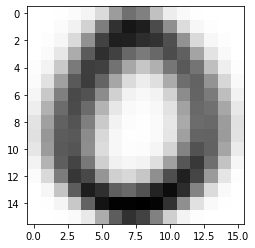

In [ ]:
from lib import show_digit_mean
show_digit_mean(features, labels, 0)

In [ ]:
import matplotlib.pyplot as plt

## Show Variance at digit

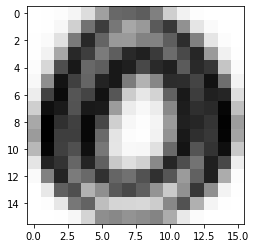

In [ ]:
from lib import show_digit_variance
show_digit_variance(features, labels, 0)

## Mean at every digit

In [ ]:
unique_labels = np.unique(labels)
mean_per_digit = np.array(
    [digit_mean(features, labels, digit).reshape(256,) 
        for digit in unique_labels])
print('Array of means per digit has shape =', mean_per_digit.shape)

Array of means per digit has shape = (10, 256)


## Variance at every digit

In [ ]:
var_per_digit = np.array([
    digit_variance(features, labels, digit).reshape(256,) 
        for digit in unique_labels])

var_per_digit[np.where(var_per_digit == 0)] = 1
print(np.where(var_per_digit == 0))
print(np.prod(var_per_digit, axis = 1))

print('Array of variances per digit has shape =', var_per_digit.shape)
# close by pixels should have small relevant var and pixels far away should have relatively larger diff on var
# The fat 'tails' on var plots are logical as they represent the difference from mean 
# Naive Bayes to be implemented by hand, the rest to be imported
# Cross val only on train set (AFTER finding best model THEN check if results are same on test(scorewise))
# Take weak learners that make different mistakes on an ensemble method(use together those that make diff mistakes)
# better use the long implement on NN

(array([], dtype=int64), array([], dtype=int64))
[7.95348958e-180 6.17749445e-292 4.40119896e-134 4.77848298e-183
 1.08069879e-179 6.38106512e-147 9.34304220e-257 9.20796829e-235
 5.33700432e-196 2.09686636e-238]
Array of variances per digit has shape = (10, 256)


## Show Mean at every digit

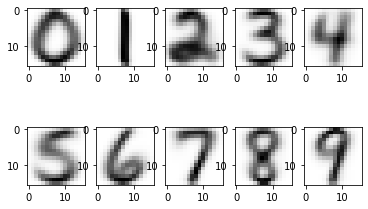

In [ ]:
from lib import plot_digit_means

plot_digit_means(features, labels)

## Read Test Data

In [ ]:
from lib import euclidean_distance, euclidean_distance_classifier

filename = os.path.join(os.getcwd() + '\data', 'test.txt')
X_test = np.genfromtxt(filename)
features = X_test[:,1:]
labels = X_test[:,0]
print(features.shape)

(2007, 256)


## Classify Test Sample 101 

In [ ]:
classifier_results = euclidean_distance_classifier(features[101], mean_per_digit)
print(classifier_results==labels[101])

False


## Classify Test Samples

In [ ]:
classifier_results = euclidean_distance_classifier(features, mean_per_digit)

## Calculate Accuracy

In [ ]:
sum(classifier_results == labels)/len(labels)

0.8141504733432985

## Euclid scikit-learn estimator

* **Fit Model**

In [ ]:
from lib import EuclideanDistanceClassifier
import numpy as np 
import os 
filename = os.path.join(os.getcwd() + '\data', 'train.txt')
X_train = np.genfromtxt(filename)
train_features = X_train[:, 1:]
train_labels = X_train[:, 0]

edc = EuclideanDistanceClassifier()
edc.fit(train_features, train_labels)


EuclideanDistanceClassifier()

* **Predict Digits**

In [ ]:
filename = os.path.join(os.getcwd() + '\data', 'test.txt')
X_test = np.genfromtxt(filename)

test_features = X_test[:,1:]
test_labels = X_test[:,0]

y_predict = edc.predict(test_features)

* **Accuracy Score**

In [ ]:
edc.score(train_features, train_labels)

0.851323549581676

* **Cross Validation**

In [ ]:
from lib import evaluate_classifier

features = np.concatenate((train_features, test_features), axis = 0)
labels = np.concatenate((train_labels, test_labels), axis = 0)
print(evaluate_classifier(EuclideanDistanceClassifier(), train_features, train_labels))

c:\Users\Jim\Desktop\DSML\PatternRecognition\Patternenv\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


[array([4., 4., 4., ..., 1., 4., 3.]) array([1., 0., 1., ..., 7., 2., 5.])
 array([1., 6., 8., ..., 0., 6., 7.]) array([1., 0., 0., ..., 2., 9., 0.])] [array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        ...,
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -0.915, ..., -1.   , -1.   , -1.   ]])
 array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -0.856, -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        ...,
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -0.79 , -1.   , -1.   ],
        [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ]])
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -

* **Decision Boundary**

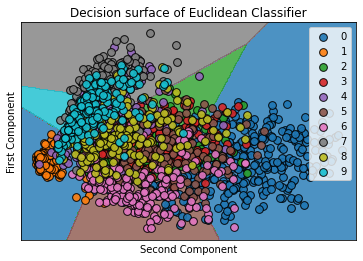

None


In [ ]:
from lib import plot_clf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
unique_labels = np.arange(10) 
pca = PCA(n_components=2)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(train_features)

pca.fit(features_scaled)

print(plot_clf(edc, test_features, test_labels, unique_labels, pca))


* **Learning Curve**

In [ ]:
from sklearn.model_selection import learning_curve
from lib import plot_learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    EuclideanDistanceClassifier(), train_features, train_labels, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.02, 1.0, 5))
print(train_features.shape)

plot_learning_curve(train_scores, test_scores, train_sizes, ylim= (0.5, 1))

## Naive Bayes Estimator

*  **Read Data**

In [ ]:
from lib import CustomNBClassifier, calculate_priors
import numpy as np
import os 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lib import complementary_clfs
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lib import EuclideanDistanceClassifier, CustomNBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

filename = os.path.join(os.getcwd() + '\data', 'train.txt')
X_train = np.genfromtxt(filename)

train_features = X_train[:, 1:]
train_labels = X_train[:, 0]

filename = os.path.join(os.getcwd() + '\data', 'test.txt')
X_test = np.genfromtxt(filename)

test_features = X_test[:,1:]
test_labels = X_test[:,0]

complementary_clfs(train_features, train_labels)

* **Fit Data**

In [ ]:
nbc = CustomNBClassifier(var_smoothing= 10 ** (-1))
nbc.fit(train_features, train_labels)

nbc_unit = CustomNBClassifier(use_unit_variance = True)
nbc_unit.fit(train_features, train_labels)

original_nbc = GaussianNB()
original_nbc.fit(train_features, train_labels)

score = nbc.score(test_features, test_labels)
unit_score = nbc_unit.score(test_features, test_labels)
original_score = original_nbc.score(test_features, test_labels)

print('Custom Naive Bayes generalized score =', score)
print()
print('Naive Bayes with unit var generalized score =', unit_score)
print()
print('Naive Bayes score =', original_score)

* **Classifier Scores**

* **Fit sklearn Classifiers**

In [ ]:
svc_poly = make_pipeline(StandardScaler(), SVC(kernel='poly'))
svc_poly.fit(train_features, train_labels)

* **sklearn classifier scores**

* **Show classifier scores**

In [ ]:
print('K Nearest Neighbors score =', neigh_score)
print()
print('Linear Support Vector Machine score =', lsvc_score)
print()
print('Polynomial Support Vector Machine score =', psvc_score)
print()
print('Sigmoid Support Vector Machine score =', sigsvc_score)
print()
print('Rbf Support Vector Machine score =', rbf_score)
print()
print('Gaussian Naive Bayes score =', gnb_score)
print()
print('Euclidean Distance Classifier score=', ecd_score)

* **Find classifiers with complementary mistakes**

In [ ]:
from itertools import combinations


In [ ]:
print(voting_clfs)
print()
print(worst_scores)
print()
print(classifiers)

In [ ]:
from sklearn.ensemble import VotingClassifier
from lib import calculate_priors

ecd = EuclideanDistanceClassifier()


In [ ]:
eclf = VotingClassifier(estimators= [(str(elem), elem) for elem in best_score], voting= 'hard')
eclf.fit(train_features, train_labels)
print('Generalized score of the best VotingClassifier =',eclf.score(test_features, test_labels))

In [ ]:
lsvc.probability = True
psvc.probability = True 

sigsvc.probability = True
rbfsvc.probability = True
print(classifiers)

ensemble_score_soft = {}
for tup in voting_clfs:
    print(tup)
    eclf = VotingClassifier(estimators=[(str(elem), elem) for elem in tup], voting='soft')
    eclf.fit(train_features, train_labels)
    ensemble_score_soft[tup] = eclf.score(test_features, test_labels)

In [ ]:
best_score = max(ensemble_score_hard, key = ensemble_score_hard.get)
best_score

* **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
from lib import CustomNBClassifier, calculate_priors
from sklearn.model_selection import train_test_split
import numpy as np
import os 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
filename = os.path.join(os.getcwd() + '\data', 'train.txt')
X_train = np.genfromtxt(filename)

train_features = X_train[:, 1:]
train_labels = X_train[:, 0]

train_features, eval_features, train_labels, eval_labels = \
    train_test_split(train_features, train_labels, train_size=0.33)

filename = os.path.join(os.getcwd() + '\data', 'test.txt')
X_test = np.genfromtxt(filename)

test_features = X_test[:,1:]
test_labels = X_test[:,0]

In [ ]:
from lib import myNet
net = myNet(256, 100, 10)
net.fit(train_dl, Epochs= 30)
net.evaluate(eval_dl)

NameError: name 'train_dl' is not defined

In [ ]:
from lib import myNet
import torch
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame

ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df, loc='center')  # where df is your data frame

plt.savefig('net_params.png')

In [ ]:
from lib import PytorchNNModel
from lib import myNet
import torch
import torch.nn as nn
from lib import evaluate_classifier

pnn = PytorchNNModel(myNet(256, 600, 10), nn.CrossEntropyLoss(), 
    torch.optim.SGD(myNet(256, 600, 10).parameters(), 
    lr = 0.002))

pnn.fit(train_features, train_labels)
train_features, eval_features, train_labels, eval_labels = \
      train_test_split(train_features, train_labels, train_size=0.33)

# evaluate_classifier(pnn.model, eval_features, eval_labels)

Epoch: 0 	 Batch: 0 	 Loss 7.840469837188721
Epoch: 1 	 Batch: 0 	 Loss 8.623019218444824
Epoch: 2 	 Batch: 0 	 Loss 7.7175164222717285
Epoch: 3 	 Batch: 0 	 Loss 14.157975196838379
Epoch: 4 	 Batch: 0 	 Loss 21.067628860473633
Epoch: 5 	 Batch: 0 	 Loss 19.88084602355957
Epoch: 6 	 Batch: 0 	 Loss 16.23689842224121
Epoch: 7 	 Batch: 0 	 Loss 19.63878631591797
Epoch: 8 	 Batch: 0 	 Loss 12.008946418762207
Epoch: 9 	 Batch: 0 	 Loss 13.8682222366333
Epoch: 10 	 Batch: 0 	 Loss 18.422929763793945
Epoch: 11 	 Batch: 0 	 Loss 17.718746185302734
Epoch: 12 	 Batch: 0 	 Loss 8.346519470214844
Epoch: 13 	 Batch: 0 	 Loss 21.260990142822266
Epoch: 14 	 Batch: 0 	 Loss 6.556044578552246
Epoch: 15 	 Batch: 0 	 Loss 14.13341236114502
Epoch: 16 	 Batch: 0 	 Loss 14.241833686828613
Epoch: 17 	 Batch: 0 	 Loss 8.581464767456055
Epoch: 18 	 Batch: 0 	 Loss 13.676373481750488
Epoch: 19 	 Batch: 0 	 Loss 8.8851318359375
Epoch: 20 	 Batch: 0 	 Loss 16.942459106445312
Epoch: 21 	 Batch: 0 	 Loss 8.4391374

In [ ]:
y_pred = pnn.predict(test_features)
pnn.score(test_features, test_labels)

0.8943697060288989